In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Data Describe

 Step 1: Load and Inspect

In this step, we load the dataset, check its structure, detect missing values, and look for duplicates.

In [2]:
df = pd.read_csv("hr.csv")
df

,employee_number,age,attrition,business_travel,department,distance_from_home,education,education_field,environment_satisfaction,gender,...,job_satisfaction,marital_status,monthly_income,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,training_times_last_year,work_life_balance
0,1,41,Yes,Travel_Rarely,Sales,1,Some college,Life Sciences,Medium,Female,...,Very high,Single,5993,8,Yes,11,Excellent,Low,0,Bad
1,2,49,No,Travel_Frequently,Research & Development,8,No college,Life Sciences,High,Male,...,Medium,Married,5130,1,No,23,Outstanding,Very high,3,Better
2,4,37,Yes,Travel_Rarely,Research & Development,2,Some college,Other,Very high,Male,...,High,Single,2090,6,Yes,15,Excellent,Medium,3,Better
3,5,33,No,Travel_Frequently,Research & Development,3,Masters,Life Sciences,Very high,Female,...,High,Married,2909,1,Yes,11,Excellent,High,3,Better
4,7,27,No,Travel_Rarely,Research & Development,2,No college,Medical,Low,Male,...,Medium,Married,3468,9,No,12,Excellent,Very high,3,Better
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,36,No,Travel_Frequently,Research & Development,23,Some college,Medical,High,Male,...,Very high,Married,2571,4,No,17,Excellent,High,3,Better
1466,2062,39,No,Travel_Rarely,Research & Development,6,No college,Medical,Very high,Male,...,Low,Married,9991,4,No,15,Excellent,Low,5,Better
1467,2064,27,No,Travel_Rarely,Research & Development,4,Bachelors,Life Sciences,Medium,Male,...,Medium,Married,6142,1,Yes,20,Outstanding,Medium,0,Better
1468,2065,49,No,Travel_Frequently,Sales,2,Bachelors,Medical,Very high,Male,...,Medium,Married,5390,2,No,14,Excellent,Very high,3,Good


In [3]:
df.head()

,employee_number,age,attrition,business_travel,department,distance_from_home,education,education_field,environment_satisfaction,gender,...,job_satisfaction,marital_status,monthly_income,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,training_times_last_year,work_life_balance
0,1,41,Yes,Travel_Rarely,Sales,1,Some college,Life Sciences,Medium,Female,...,Very high,Single,5993,8,Yes,11,Excellent,Low,0,Bad
1,2,49,No,Travel_Frequently,Research & Development,8,No college,Life Sciences,High,Male,...,Medium,Married,5130,1,No,23,Outstanding,Very high,3,Better
2,4,37,Yes,Travel_Rarely,Research & Development,2,Some college,Other,Very high,Male,...,High,Single,2090,6,Yes,15,Excellent,Medium,3,Better
3,5,33,No,Travel_Frequently,Research & Development,3,Masters,Life Sciences,Very high,Female,...,High,Married,2909,1,Yes,11,Excellent,High,3,Better
4,7,27,No,Travel_Rarely,Research & Development,2,No college,Medical,Low,Male,...,Medium,Married,3468,9,No,12,Excellent,Very high,3,Better


In [4]:
# Check column types, non-null counts, memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   employee_number            1470 non-null   int64 
 1   age                        1470 non-null   int64 
 2   attrition                  1470 non-null   object
 3   business_travel            1470 non-null   object
 4   department                 1470 non-null   object
 5   distance_from_home         1470 non-null   int64 
 6   education                  1470 non-null   object
 7   education_field            1470 non-null   object
 8   environment_satisfaction   1470 non-null   object
 9   gender                     1470 non-null   object
 10  job_involvement            1470 non-null   object
 11  job_role                   1470 non-null   object
 12  job_satisfaction           1470 non-null   object
 13  marital_status             1470 non-null   object
 14  monthly_

In [5]:
# Descriptive stats for numeric columns
df.describe()

,employee_number,age,distance_from_home,monthly_income,num_companies_worked,percent_salary_hike,training_times_last_year
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1024.865306,36.923810,9.192517,6502.931293,2.693197,15.209524,2.799320
std,602.024335,9.135373,8.106864,4707.956783,2.498009,3.659938,1.289271
min,1.000000,18.000000,1.000000,1009.000000,0.000000,11.000000,0.000000
25%,491.250000,30.000000,2.000000,2911.000000,1.000000,12.000000,2.000000
50%,1020.500000,36.000000,7.000000,4919.000000,2.000000,14.000000,3.000000
75%,1555.750000,43.000000,14.000000,8379.000000,4.000000,18.000000,3.000000
max,2068.000000,60.000000,29.000000,19999.000000,9.000000,25.000000,6.000000


In [6]:
df.isnull()

,employee_number,age,attrition,business_travel,department,distance_from_home,education,education_field,environment_satisfaction,gender,...,job_satisfaction,marital_status,monthly_income,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,training_times_last_year,work_life_balance
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# Total missing values in each column
df.isnull().sum()

employee_number              0
age                          0
attrition                    0
business_travel              0
department                   0
distance_from_home           0
education                    0
education_field              0
environment_satisfaction     0
gender                       0
job_involvement              0
job_role                     0
job_satisfaction             0
marital_status               0
monthly_income               0
num_companies_worked         0
over_time                    0
percent_salary_hike          0
performance_rating           0
relationship_satisfaction    0
training_times_last_year     0
work_life_balance            0
dtype: int64

In [8]:
# Number of completely duplicated rows
df.duplicated().sum()

0

In [9]:
# Column names are already clean (lowercase, snake_case) – no need to rename

### 📋 Summary of Step 1: Data Loading and Initial Checks
- Dataset has 1,470 rows and 35 columns.
- No missing values detected.
- No duplicate rows found.
- Column names are already clean and follow `snake_case` format.
- Key columns for analysis: `attrition`, `monthly_income`, `over_time`, `department`, `job_satisfaction`.

## 📊 Step 2: Exploratory Data Analysis (EDA)

In this step, we explore the dataset to uncover key patterns, trends, and relationships — especially those affecting employee attrition. This helps build intuition for visualizing and solving the problem.


In [10]:
df

,employee_number,age,attrition,business_travel,department,distance_from_home,education,education_field,environment_satisfaction,gender,...,job_satisfaction,marital_status,monthly_income,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,training_times_last_year,work_life_balance
0,1,41,Yes,Travel_Rarely,Sales,1,Some college,Life Sciences,Medium,Female,...,Very high,Single,5993,8,Yes,11,Excellent,Low,0,Bad
1,2,49,No,Travel_Frequently,Research & Development,8,No college,Life Sciences,High,Male,...,Medium,Married,5130,1,No,23,Outstanding,Very high,3,Better
2,4,37,Yes,Travel_Rarely,Research & Development,2,Some college,Other,Very high,Male,...,High,Single,2090,6,Yes,15,Excellent,Medium,3,Better
3,5,33,No,Travel_Frequently,Research & Development,3,Masters,Life Sciences,Very high,Female,...,High,Married,2909,1,Yes,11,Excellent,High,3,Better
4,7,27,No,Travel_Rarely,Research & Development,2,No college,Medical,Low,Male,...,Medium,Married,3468,9,No,12,Excellent,Very high,3,Better
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,36,No,Travel_Frequently,Research & Development,23,Some college,Medical,High,Male,...,Very high,Married,2571,4,No,17,Excellent,High,3,Better
1466,2062,39,No,Travel_Rarely,Research & Development,6,No college,Medical,Very high,Male,...,Low,Married,9991,4,No,15,Excellent,Low,5,Better
1467,2064,27,No,Travel_Rarely,Research & Development,4,Bachelors,Life Sciences,Medium,Male,...,Medium,Married,6142,1,Yes,20,Outstanding,Medium,0,Better
1468,2065,49,No,Travel_Frequently,Sales,2,Bachelors,Medical,Very high,Male,...,Medium,Married,5390,2,No,14,Excellent,Very high,3,Good


## Overall Attrition Count

Text(0.5, 1.0, 'Overall Attrition Count')

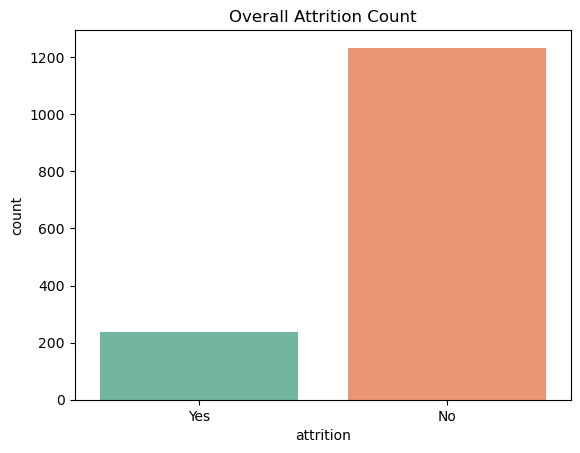

In [11]:
sns.countplot(data=df,x="attrition",palette='Set2')
plt.title('Overall Attrition Count')

##  Attrition by Department

Text(0.5, 1.0, 'Attrition By Department')

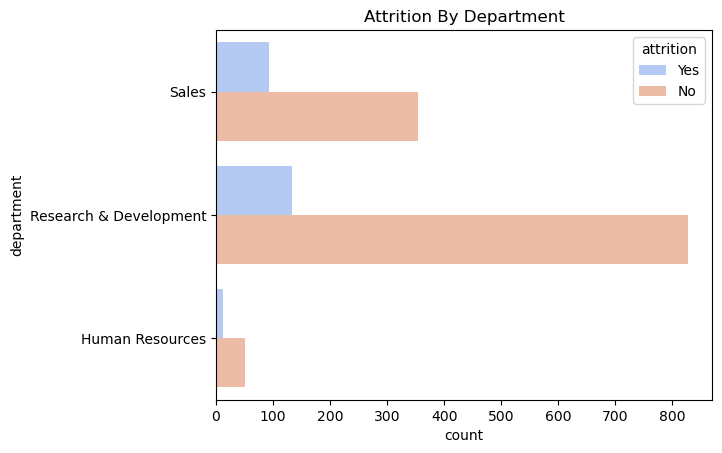

In [12]:
sns.countplot(data=df,y="department",hue="attrition",palette="coolwarm")
plt.title("Attrition By Department")

## Attrition by OverTime

Text(0.5, 1.0, 'Attrition Vs OverTime')

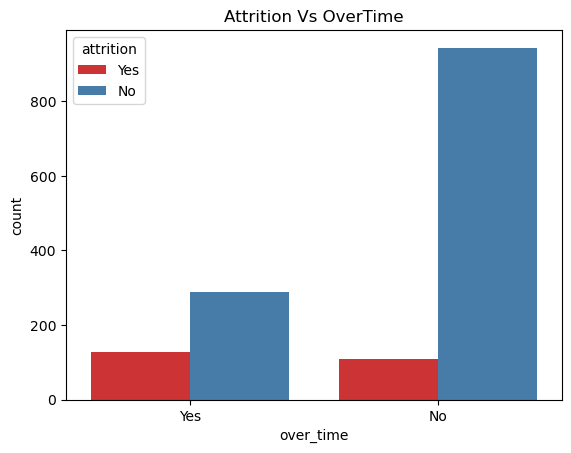

In [13]:
sns.countplot(data=df,x="over_time",hue="attrition",palette="Set1")
plt.title("Attrition Vs OverTime")

## Boxplot: Monthly Income vs Attrition

Text(0.5, 1.0, 'Income Distribution by Attrition')

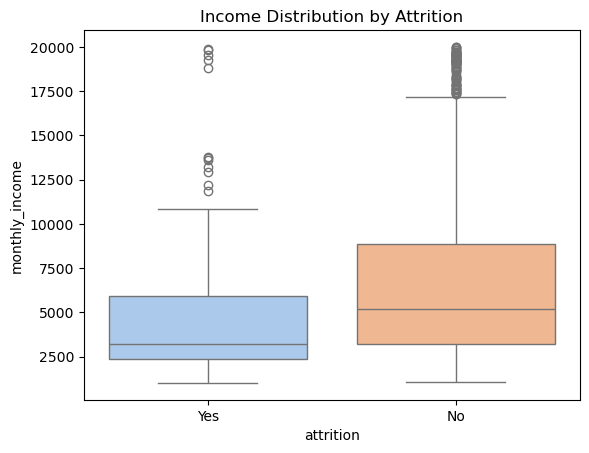

In [14]:
sns.boxplot(data=df,y="monthly_income",x="attrition",palette="pastel")
plt.title("Income Distribution by Attrition")

## KDE Plot: Age vs Attrition

Text(0.5, 1.0, 'Age Distribution by Attrition')

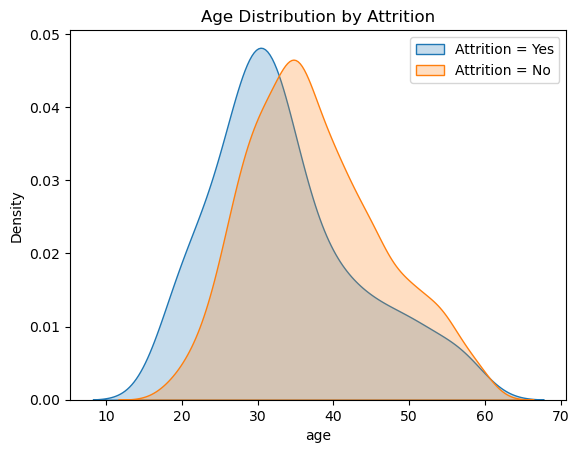

In [15]:
sns.kdeplot(data=df[df['attrition']=='Yes']['age'],fill=True, label='Attrition = Yes')
sns.kdeplot(data=df[df['attrition']=='No']['age'],fill=True, label='Attrition = No')
plt.legend()
plt.title("Age Distribution by Attrition")


## Job Satisfaction vs Attrition

Text(0.5, 1.0, 'Job Satisfaction and Attrition')

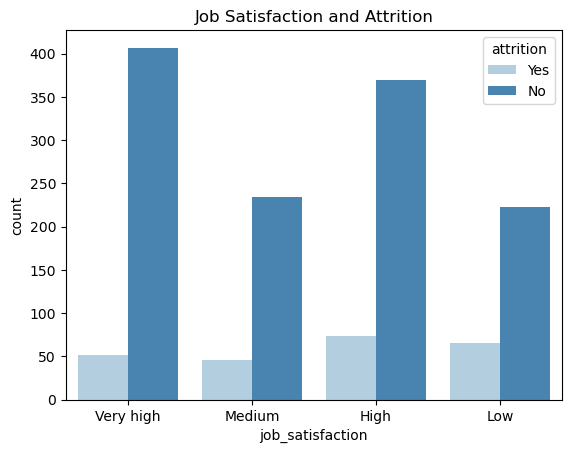

In [16]:
sns.countplot(x='job_satisfaction', hue='attrition', data=df, palette='Blues')
plt.title('Job Satisfaction and Attrition')


## Correlation Heatmap (with attrition flag)

Text(0.5, 1.0, 'Correlation Heatmap')

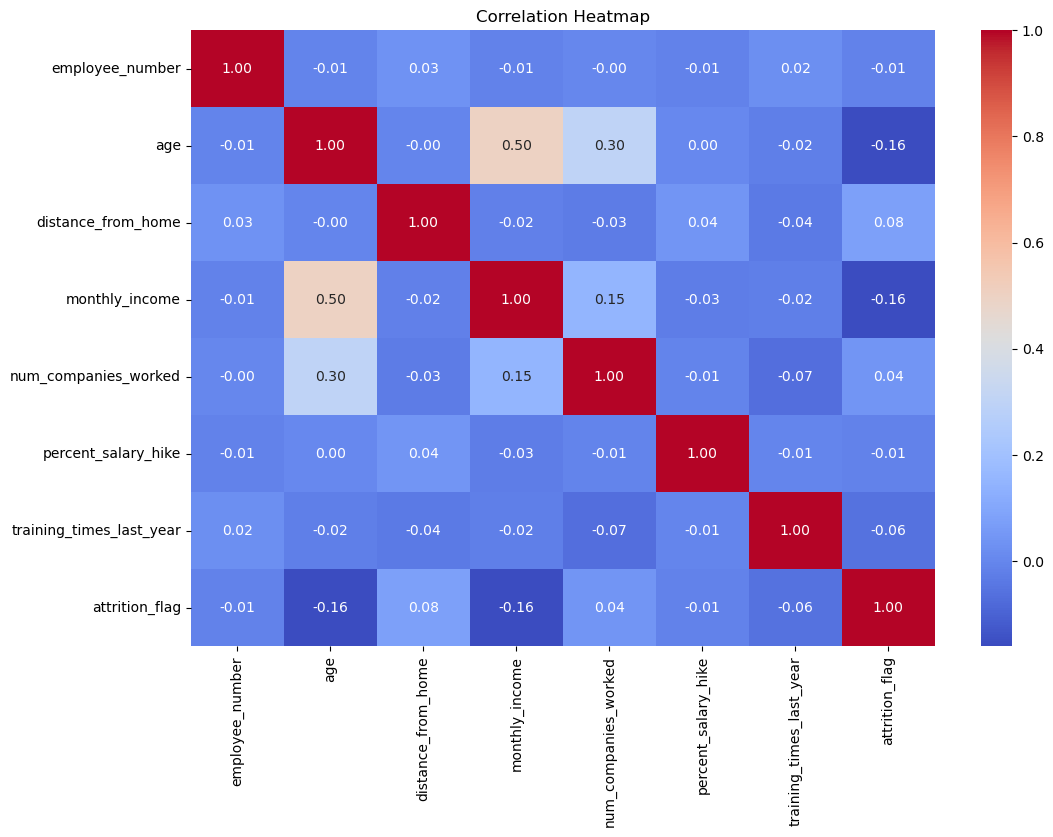

In [17]:
df['attrition_flag'] = df['attrition'].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")


## Attrition by Marital Status + Gender (Stacked Bar)

Text(0.5, 1.0, 'Attrition by Marital Status')

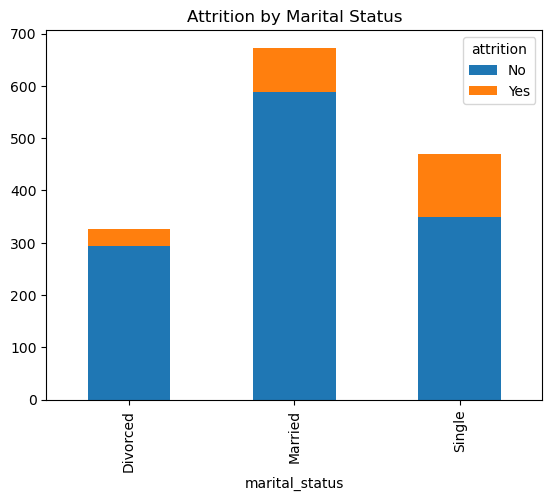

In [18]:
pd.crosstab(df['marital_status'], df['attrition']).plot(kind='bar', stacked=True)
plt.title("Attrition by Marital Status")

## Attrition Rate (Percentage) per Category

Text(0.5, 1.0, 'Attrition Rate by Education Field (%)')

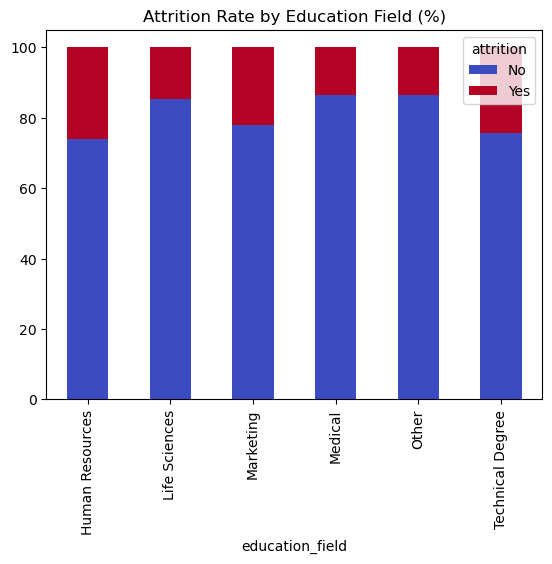

In [19]:
attrition_rate = pd.crosstab(df["education_field"],df["attrition"],normalize="index") * 100
attrition_rate.plot(kind="bar",stacked=True,colormap='coolwarm')
plt.title("Attrition Rate by Education Field (%)")


## Pairplot

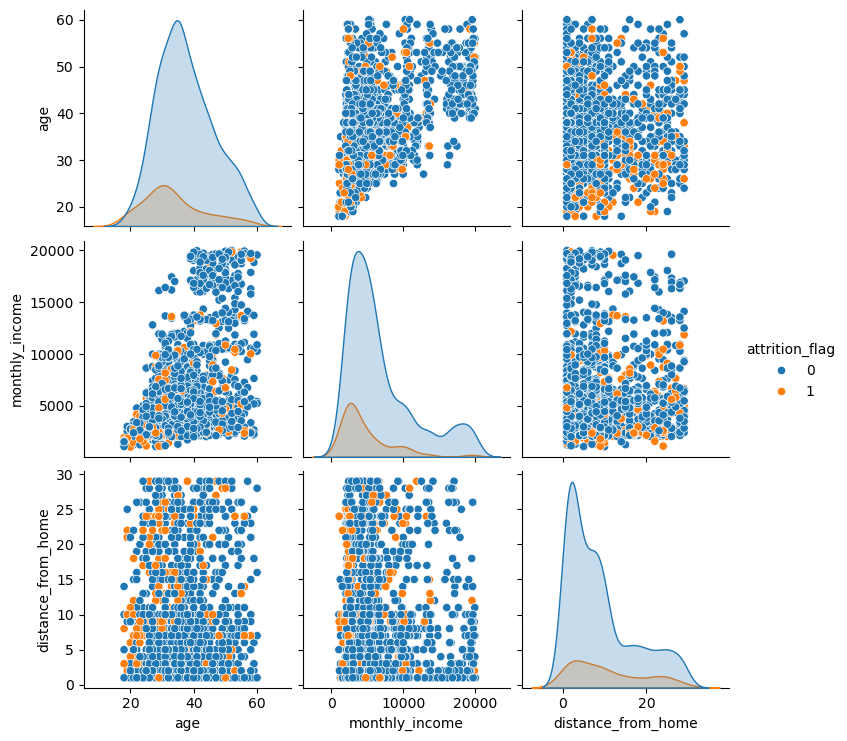

In [20]:
sns.pairplot(df[['age', 'monthly_income', 'distance_from_home', 'attrition_flag']], hue='attrition_flag')


 ### ✅ Step 2 Summary: Key EDA Findings

- Count of overall attrition 
- Attrition by department 
- Attrition by overtime 
- Boxplot: Monthly income vs attrition 
- KDE plot: Age distribution vs attrition 
- Job satisfaction vs attrition 
- Correlation heatmap 
- Stacked bar chart: Marital status vs attrition 
- Pairplot of key numeric features 

## 🧠 Step 3: Machine Learning Preparation

In this step, we prepare the dataset for machine learning by transforming it into a format suitable for predictive modeling. This includes converting categorical values to numeric, removing irrelevant columns, and splitting the data into training and testing sets. These steps are essential to ensure that machine learning algorithms can understand and learn from the data effectively.

In [21]:
# Create binary target
df['attrition_flag'] = df['attrition'].map({'Yes': 1, 'No': 0})

In [22]:
df

,employee_number,age,attrition,business_travel,department,distance_from_home,education,education_field,environment_satisfaction,gender,...,marital_status,monthly_income,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,training_times_last_year,work_life_balance,attrition_flag
0,1,41,Yes,Travel_Rarely,Sales,1,Some college,Life Sciences,Medium,Female,...,Single,5993,8,Yes,11,Excellent,Low,0,Bad,1
1,2,49,No,Travel_Frequently,Research & Development,8,No college,Life Sciences,High,Male,...,Married,5130,1,No,23,Outstanding,Very high,3,Better,0
2,4,37,Yes,Travel_Rarely,Research & Development,2,Some college,Other,Very high,Male,...,Single,2090,6,Yes,15,Excellent,Medium,3,Better,1
3,5,33,No,Travel_Frequently,Research & Development,3,Masters,Life Sciences,Very high,Female,...,Married,2909,1,Yes,11,Excellent,High,3,Better,0
4,7,27,No,Travel_Rarely,Research & Development,2,No college,Medical,Low,Male,...,Married,3468,9,No,12,Excellent,Very high,3,Better,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,36,No,Travel_Frequently,Research & Development,23,Some college,Medical,High,Male,...,Married,2571,4,No,17,Excellent,High,3,Better,0
1466,2062,39,No,Travel_Rarely,Research & Development,6,No college,Medical,Very high,Male,...,Married,9991,4,No,15,Excellent,Low,5,Better,0
1467,2064,27,No,Travel_Rarely,Research & Development,4,Bachelors,Life Sciences,Medium,Male,...,Married,6142,1,Yes,20,Outstanding,Medium,0,Better,0
1468,2065,49,No,Travel_Frequently,Sales,2,Bachelors,Medical,Very high,Male,...,Married,5390,2,No,14,Excellent,Very high,3,Good,0


In [23]:
# Drop Irrelevant or Constant Columns
df = df.drop(['employee_number', 'attrition'], axis=1, errors='ignore')

In [24]:
# Features and target
X = df.drop('attrition_flag', axis=1)
y = df['attrition_flag']

In [25]:
# Encode categorical variables in X only
X = pd.get_dummies(X, drop_first=True)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [27]:
print(y_train.isnull().sum()) 
print(y_test.isnull().sum())

0
0


## 📋 Step 3 Summary: Machine Learning Preparation
- Converted Attrition column to numeric (Yes → 1, No → 0) as attrition_flag.
- Dropped irrelevant or constant columns like employee_number and attrition.
- Encoded categorical features using one-hot encoding to make the data numeric.
- Split the dataset into:
  - Features (X) – used to predict
  - Target (y) – what we want to predict (attrition_flag)
- Performed an 80/20 train-test split to evaluate model performance on unseen data.
- These steps ensured the dataset is clean, fully numeric, and ready for training ML models.

## 🧠 Step 4: Model Training – Logistic Regression
In this step, we train our first machine learning model to predict employee attrition based on the features we prepared. We’ll use Logistic Regression, a simple and powerful classification algorithm ideal for binary problems like this one (Attrition: Yes/No).

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [29]:
# Initialize and Train the Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [30]:
y_pred = model.predict(X_test)

In [31]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[240  15]
 [ 25  14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       255
           1       0.48      0.36      0.41        39

    accuracy                           0.86       294
   macro avg       0.69      0.65      0.67       294
weighted avg       0.85      0.86      0.86       294

Accuracy Score: 0.8639455782312925


### 4.1 Logistic Regression
> Summary of Logistic Regression results...

- It had decent accuracy but **low recall and F1-score for attrition**, so now we try a more powerful model.

### 🌲 4.2 Random Forest Classifier
> We train a Random Forest to better capture patterns in attrition and improve recall.

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred_rf))
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred_rf))


📊 Confusion Matrix:
 [[255   0]
 [ 37   2]]

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       1.00      0.05      0.10        39

    accuracy                           0.87       294
   macro avg       0.94      0.53      0.51       294
weighted avg       0.89      0.87      0.82       294

✅ Accuracy Score: 0.8741496598639455


## 📦 Step 4 Summary: Machine Learning Models

We trained and evaluated two models to predict employee attrition:

1. **Logistic Regression**  
   - Accuracy: 86.4%  
   - Recall for attrition: 36%  
   - Simple and interpretable model

2. **Random Forest Classifier**  
   - Accuracy: 87.4%  
   - Recall for attrition: 5%  
   - Powerful model but struggled with class imbalance

🎯 **Conclusion**: Although Random Forest had higher overall accuracy, Logistic Regression did better at identifying attrition cases. For simplicity and interpretability, we'll use Logistic Regression for insights and business recommendations.